# predict cricket matches 

In [1]:
#import the Libraries 
import numpy as np #to handle multi dimensional arrays 
import pandas as pd #special data sturcture which called data frame 
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
import os
print(os.listdir("../Testing/Dataset")) #data Set path and get all data set 



['ContinousDataset.csv', 'originalDataset.csv', 'LabelledDataset.csv', 'CategoricalDataset.csv']


In [69]:
data = pd.read_csv("../Testing/Dataset/ContinousDataset.csv")
data.tail(10)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
7484,3742,ODI # 3926,Sri Lanka,Pakistan,Winner2ndInning,Abu Dhabi,"Oct 18, 2017",Pakistan,U.A.E.,Neutral,Neutral,First,Second
7485,3743,ODI # 3927,Sri Lanka,Pakistan,Winner2ndInning,Sharjah,"Oct 20, 2017",Pakistan,U.A.E.,Neutral,Neutral,First,Second
7486,3744,ODI # 3928,New Zealand,India,Winner2ndInning,Mumbai,"Oct 22, 2017",New Zealand,India,Away,Home,Second,First
7487,3745,ODI # 3929,Bangladesh,South Africa,Winner1stInning,East London,"Oct 22, 2017",South Africa,South Africa,Away,Home,Second,First
7488,3746,ODI # 3930,Sri Lanka,Pakistan,Winner2ndInning,Sharjah,"Oct 23, 2017",Pakistan,U.A.E.,Neutral,Neutral,First,Second
7489,3747,ODI # 3931,New Zealand,India,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Away,Home,First,Second
7490,3748,ODI # 3932,New Zealand,India,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Away,Home,Second,First
7491,3749,ODI # 3933,Namibia,Hong Kong,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,Second,First
7492,3750,ODI # 3934,U.S.A.,Bermuda,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,Second,First
7493,3749,ODI # 3935,Namibia,East Africa,Winner1stInning,Mumbai,"Aug 12, 2017",East Africa,India,Neutral,Neutral,Second,First


In [4]:
lines= len(data)

print(lines)

7494


In [5]:
originaldata = pd.read_csv("../Testing/Dataset/originalDataset.csv")
originaldata.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [6]:
labelldata = pd.read_csv("../Testing/Dataset/LabelledDataset.csv")
labelldata.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Innings_Team1_Second,Innings_Team2_First,Innings_Team2_Second,Venue_Team1_Away,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Away,Venue_Team2_Home,Venue_Team2_Neutral,Winner
0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,Australia
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,Australia
3,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,New Zealand


In [7]:
categoricaldata = pd.read_csv("../Testing/Dataset/CategoricalDataset.csv")
categoricaldata.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Winner_New Zealand,Winner_P.N.G.,Winner_Pakistan,Winner_Scotland,Winner_South Africa,Winner_Sri Lanka,Winner_U.A.E.,Winner_U.S.A.,Winner_West Indies,Winner_Zimbabwe
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
data.head(15)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
5,5,ODI # 6,England,New Zealand,Winner2ndInning,Swansea,"Jul 18, 1973",England,England,Home,Away,Second,First
6,6,ODI # 8,England,West Indies,Winner2ndInning,Leeds,"Sep 5, 1973",England,England,Home,Away,Second,First
7,7,ODI # 9,England,West Indies,Winner2ndInning,The Oval,"Sep 7, 1973",West Indies,England,Home,Away,First,Second
8,8,ODI # 10,New Zealand,Australia,Winner2ndInning,Dunedin,"Mar 30, 1974",Australia,New Zealand,Home,Away,First,Second
9,9,ODI # 11,New Zealand,Australia,Winner1stInning,Christchurch,"Mar 31, 1974",Australia,New Zealand,Home,Away,Second,First


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
dtypes: int64(1), object(12)
memory usage: 761.2+ KB


In [10]:
match_data1= data['Team 1'].value_counts(sort=True)
match_data2= data['Team 2'].value_counts(sort=True)

match_won = data['Winner'].value_counts(sort=True)
total_Matches_played = match_data1 + match_data2
lost = total_Matches_played - match_won
total_Matches_played

India           1760
Australia       1718
Pakistan        1708
Sri Lanka       1532
West Indies     1462
New Zealand     1372
England         1328
South Africa    1122
Zimbabwe         948
Bangladesh       656
Kenya            298
Ireland          226
Scotland         174
Afghanistan      162
Canada           150
Netherlands      144
Bermuda           72
U.A.E.            70
Hong Kong         36
P.N.G.            20
Namibia           16
East Africa        8
U.S.A.             6
dtype: int64

### Exploratory Data Analysis


In [11]:
match_won

Australia       1104
India            950
Pakistan         932
West Indies      760
Sri Lanka        742
South Africa     722
England          686
New Zealand      648
Zimbabwe         258
Bangladesh       210
Ireland          102
Kenya             84
Afghanistan       84
Scotland          62
Netherlands       56
Canada            34
U.A.E.            18
Bermuda           14
Hong Kong         12
P.N.G.            10
Namibia            2
U.S.A.             2
East Africa        2
Name: Winner, dtype: int64

In [12]:
lost

Afghanistan      78
Australia       614
Bangladesh      446
Bermuda          58
Canada          116
East Africa       6
England         642
Hong Kong        24
India           810
Ireland         124
Kenya           214
Namibia          14
Netherlands      88
New Zealand     724
P.N.G.           10
Pakistan        776
Scotland        112
South Africa    400
Sri Lanka       790
U.A.E.           52
U.S.A.            4
West Indies     702
Zimbabwe        690
dtype: int64

In [13]:
data['Winner'].value_counts()

Australia       1104
India            950
Pakistan         932
West Indies      760
Sri Lanka        742
South Africa     722
England          686
New Zealand      648
Zimbabwe         258
Bangladesh       210
Ireland          102
Kenya             84
Afghanistan       84
Scotland          62
Netherlands       56
Canada            34
U.A.E.            18
Bermuda           14
Hong Kong         12
P.N.G.            10
Namibia            2
U.S.A.             2
East Africa        2
Name: Winner, dtype: int64

In [14]:
match_wins1 = data['Winner'].value_counts(sort=True) #match wins by team

In [15]:
data['Team 1'].value_counts()

India           880
Australia       859
Pakistan        854
Sri Lanka       766
West Indies     731
New Zealand     686
England         664
South Africa    561
Zimbabwe        474
Bangladesh      328
Kenya           149
Ireland         113
Scotland         87
Afghanistan      81
Canada           75
Netherlands      72
Bermuda          36
U.A.E.           35
Hong Kong        18
P.N.G.           10
Namibia           8
East Africa       4
U.S.A.            3
Name: Team 1, dtype: int64

### checking any missing values


In [16]:
data[data['Winner'].isnull() == True ]

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2


#### 0 missing values of winner data


###### change the data of team 1, team 2,winner,host country by country code 1 to 23

In [17]:
team_encodings = {
    'India': 1,
    'Australia' : 2,
    'Pakistan' : 3,
    'Sri Lanka' : 4,
    'West Indies': 5,
    'New Zealand': 6,
    'England': 7,
    'South Africa': 8,
    'Zimbabwe': 9,
    'Bangladesh': 10,
    'Kenya': 11,
    'Ireland': 12,
    'Scotland': 13,
    'Afghanistan': 14,
    'Canada': 15,
    'Netherlands': 16,
    'Bermuda': 17,
    'U.A.E.': 18,
    'Hong Kong': 19,
    'P.N.G.': 20,
    'Namibia': 21,
    'East Africa': 22,
    'U.S.A.': 23,
    'Malaysia' : 4,
    'Papua New Guinea': 9,
    
}

team_encode_dict ={
    'Team 1':team_encodings,
    'Team 2':team_encodings,
    'Winner':team_encodings,
    'Host_Country':team_encodings

}

data.replace(team_encode_dict, inplace = True)
data.head(30)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,2,7,Winner2ndInning,Melbourne,"Jan 5, 1971",2,2.0,Home,Away,Second,First
1,1,ODI # 2,7,2,Winner2ndInning,Manchester,"Aug 24, 1972",7,7.0,Home,Away,Second,First
2,2,ODI # 3,7,2,Winner2ndInning,Lord's,"Aug 26, 1972",2,7.0,Home,Away,First,Second
3,3,ODI # 4,7,2,Winner2ndInning,Birmingham,"Aug 28, 1972",7,7.0,Home,Away,Second,First
4,4,ODI # 5,6,3,Winner1stInning,Christchurch,"Feb 11, 1973",6,6.0,Home,Away,First,Second
5,5,ODI # 6,7,6,Winner2ndInning,Swansea,"Jul 18, 1973",7,7.0,Home,Away,Second,First
6,6,ODI # 8,7,5,Winner2ndInning,Leeds,"Sep 5, 1973",7,7.0,Home,Away,Second,First
7,7,ODI # 9,7,5,Winner2ndInning,The Oval,"Sep 7, 1973",5,7.0,Home,Away,First,Second
8,8,ODI # 10,6,2,Winner2ndInning,Dunedin,"Mar 30, 1974",2,6.0,Home,Away,First,Second
9,9,ODI # 11,6,2,Winner1stInning,Christchurch,"Mar 31, 1974",2,6.0,Home,Away,Second,First


###### all data has been changed and tested 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7494 non-null   int64  
 1   Scorecard      7494 non-null   object 
 2   Team 1         7494 non-null   int64  
 3   Team 2         7494 non-null   int64  
 4   Margin         7494 non-null   object 
 5   Ground         7494 non-null   object 
 6   Match Date     7494 non-null   object 
 7   Winner         7494 non-null   int64  
 8   Host_Country   7364 non-null   float64
 9   Venue_Team1    7494 non-null   object 
 10  Venue_Team2    7494 non-null   object 
 11  Innings_Team1  7494 non-null   object 
 12  Innings_Team2  7494 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 761.2+ KB


In [19]:
data['Team 1'].astype(int)

0        2
1        7
2        7
3        7
4        6
        ..
7489     6
7490     6
7491    21
7492    23
7493    21
Name: Team 1, Length: 7494, dtype: int64

In [20]:
data['Team 2'].astype(int)
data['Winner'].astype(int)


0        2
1        7
2        2
3        7
4        6
        ..
7489     1
7490     1
7491    21
7492    23
7493    22
Name: Winner, Length: 7494, dtype: int64

In [21]:
data[data['Host_Country'].isnull() == True ]

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
255,256,ODI # 267,1,2,Winner1stInning,New Delhi,"Sep 28, 1984",2,NaN,Neutral,Neutral,Second,First
661,664,ODI # 688,1,8,Winner2ndInning,New Delhi,"Nov 14, 1991",8,NaN,Neutral,Neutral,First,Second
817,820,ODI # 855,1,8,Winner1stInning,Mohali,"Nov 22, 1993",1,NaN,Neutral,Neutral,First,Second
1036,1040,ODI # 1082,2,5,Winner1stInning,Mohali,"Mar 14, 1996",2,NaN,Neutral,Neutral,First,Second
1041,1045,ODI # 1088,3,4,Winner1stInning,Singapore,"Apr 2, 1996",4,NaN,Neutral,Neutral,Second,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,3535,ODI # 3704,5,4,Winner1stInning,Pallekele,"Nov 7, 2015",4,NaN,Neutral,Neutral,Second,First
7344,3602,ODI # 3776,2,4,Winner2ndInning,Pallekele,"Sep 4, 2016",2,NaN,Neutral,Neutral,Second,First
7365,3623,ODI # 3798,6,1,Winner2ndInning,Mohali,"Oct 23, 2016",1,NaN,Neutral,Neutral,First,Second
7465,3723,ODI # 3906,1,4,Winner2ndInning,Pallekele,"Aug 24, 2017",1,NaN,Neutral,Neutral,Second,First


In [22]:
def condtion(row):
    if row['Margin'] == 'Winner1stInnin':
        return row['Team 1']
    else:
        return row['Team 2']
data['Toss Winner']= data.apply(condtion,axis =1)


def condtion2(row):
    if row['Margin'] == 'Winner1stInnin':
        if row['Innings_Team1'] == 'Second':
            return 0
        else:
            return 1
    if row['Margin'] == 'Winner2ndInning':
        if row['Innings_Team1'] == 'Second':
            return 1
        else:
            return 0
data['Toss_decision']= data.apply(condtion2,axis =1)



In [23]:
data.head(10)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Toss Winner
0,0,ODI # 1,2,7,Winner2ndInning,Melbourne,"Jan 5, 1971",2,2.0,Home,Away,Second,First,7
1,1,ODI # 2,7,2,Winner2ndInning,Manchester,"Aug 24, 1972",7,7.0,Home,Away,Second,First,2
2,2,ODI # 3,7,2,Winner2ndInning,Lord's,"Aug 26, 1972",2,7.0,Home,Away,First,Second,2
3,3,ODI # 4,7,2,Winner2ndInning,Birmingham,"Aug 28, 1972",7,7.0,Home,Away,Second,First,2
4,4,ODI # 5,6,3,Winner1stInning,Christchurch,"Feb 11, 1973",6,6.0,Home,Away,First,Second,3
5,5,ODI # 6,7,6,Winner2ndInning,Swansea,"Jul 18, 1973",7,7.0,Home,Away,Second,First,6
6,6,ODI # 8,7,5,Winner2ndInning,Leeds,"Sep 5, 1973",7,7.0,Home,Away,Second,First,5
7,7,ODI # 9,7,5,Winner2ndInning,The Oval,"Sep 7, 1973",5,7.0,Home,Away,First,Second,5
8,8,ODI # 10,6,2,Winner2ndInning,Dunedin,"Mar 30, 1974",2,6.0,Home,Away,First,Second,2
9,9,ODI # 11,6,2,Winner1stInning,Christchurch,"Mar 31, 1974",2,6.0,Home,Away,Second,First,2


In [24]:
for x in range(7494):
    data.iloc[4]

In [25]:
data['Host_Country'].fillna('1',inplace =True)
data[data['Host_Country'].isnull() == True ]
data['Host_Country'].astype(int)

0       2
1       7
2       7
3       7
4       6
       ..
7489    1
7490    1
7491    1
7492    1
7493    1
Name: Host_Country, Length: 7494, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   int64 
 3   Team 2         7494 non-null   int64 
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   int64 
 8   Host_Country   7494 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
 13  Toss Winner    7494 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 819.8+ KB


In [27]:
data['Host_Country'].value_counts()

2.0     1170
1.0      792
7.0      774
8.0      628
6.0      602
18.0     590
5.0      570
4.0      540
9.0      408
10.0     398
3.0      390
11.0     178
1        130
12.0     102
15.0      78
16.0      70
13.0      66
19.0       8
Name: Host_Country, dtype: int64

In [28]:
data['Host_Country'].astype(int)

0       2
1       7
2       7
3       7
4       6
       ..
7489    1
7490    1
7491    1
7492    1
7493    1
Name: Host_Country, Length: 7494, dtype: int64

In [29]:
data.describe()

,Unnamed: 0,Team 1,Team 2,Winner,Toss Winner
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
mean,1877.024019,5.647585,5.647585,5.106485,5.647585
std,1082.905280,3.784539,3.784539,3.449451,3.784539
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,939.250000,3.000000,3.000000,2.000000,3.000000
50%,1878.000000,5.000000,5.000000,5.000000,5.000000
75%,2814.750000,8.000000,8.000000,7.000000,8.000000
max,3750.000000,23.000000,23.000000,23.000000,23.000000


In [30]:
match_wins = data['Winner'].value_counts(sort=True)
match_wins



2     1104
1      950
3      932
5      760
4      742
8      722
7      686
6      648
9      258
10     210
12     102
11      84
14      84
13      62
16      56
15      34
18      18
17      14
19      12
20      10
21       2
23       2
22       2
Name: Winner, dtype: int64

<AxesSubplot:>

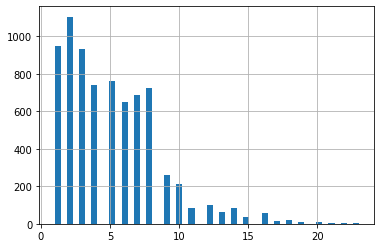

In [31]:
data['Winner'].hist(bins =50)

<AxesSubplot:title={'center':'Match Winners'}, xlabel='Team', ylabel='Count of Matches won'>

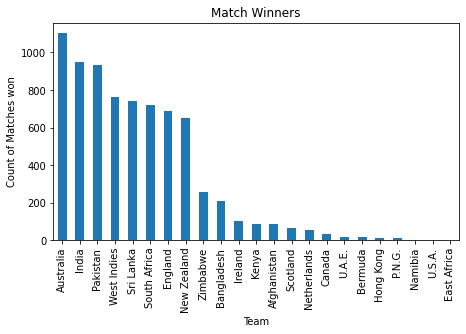

In [32]:
fig =plt.figure(figsize =(16,4))
ax1 =fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel("Count of Matches won")
ax1.set_title('Match Winners')
match_wins1.plot(kind ='bar')

# Импортируйте соответствующие пакеты для моделирования

In [33]:
#import packages for preprocessing
from sklearn.feature_selection import SelectFromModel

#import tools to split data and evalute model performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#import machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier

In [34]:
data = data[['Team 1','Team 2','Ground','Host_Country','Toss Winner','Innings_Team1','Winner']]
data

,Team 1,Team 2,Ground,Host_Country,Toss Winner,Innings_Team1,Winner
0,2,7,Melbourne,2.0,7,Second,2
1,7,2,Manchester,7.0,2,Second,7
2,7,2,Lord's,7.0,2,First,2
3,7,2,Birmingham,7.0,2,Second,7
4,6,3,Christchurch,6.0,3,First,6
...,...,...,...,...,...,...,...
7489,6,1,Pune,1.0,1,First,1
7490,6,1,Kanpur,1.0,1,Second,1
7491,21,19,Mumbai,1.0,19,Second,21
7492,23,17,Mumbai,1.0,17,Second,23


In [35]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['Ground','Innings_Team1']
encoder =LabelEncoder()
for ftr in ftr_list:
            data[ftr] =encoder.fit_transform(data[ftr])
            print(encoder.classes_)

data
            

['Aberdeen' 'Abu Dhabi' 'Adelaide' 'Ahmedabad' 'Albion' 'Albury'
 'Amritsar' 'Amstelveen' 'Auckland' 'Ayr' 'Ballarat' 'Basseterre'
 'Belfast' 'Bengaluru' 'Benoni' 'Berri' 'Birmingham' 'Bloemfontein'
 'Bogra' 'Bridgetown' 'Brisbane' 'Bristol' 'Bulawayo' 'Cairns' 'Canberra'
 'Canterbury' 'Cape Town' 'Cardiff' 'Castries' 'Centurion' 'Chandigarh'
 'Chelmsford' 'Chennai' 'Chester' 'Chittagong' 'Christchurch' 'Colombo'
 'Cuttack' 'Dambulla' 'Darwin' 'Delhi' 'Derby' 'Devonport' 'Dhaka'
 'Dharamsala' 'Dubai' 'Dublin' 'Dunedin' 'Durban' 'East London'
 'Edinburgh' 'Faisalabad' 'Faridabad' 'Fatullah' 'Galle' 'Georgetown'
 'Glasgow' 'Greater Noida' 'Gros Islet' 'Gujranwala' 'Guwahati' 'Gwalior'
 'Hambantota' 'Hamilton' 'Harare' 'Hobart' 'Hove' 'Hyderabad' 'ICCA Dubai'
 'Indore' 'Jaipur' 'Jalandhar' 'Jamshedpur' 'Jodhpur' 'Johannesburg'
 'Kandy' 'Kanpur' 'Karachi' 'Khulna' 'Kimberley' 'King City' 'Kingston'
 'Kingstown' 'Kochi' 'Kolkata' 'Kuala Lumpur' 'Kwekwe' 'Lahore'
 'Launceston' 'Leeds' 'Leice

,Team 1,Team 2,Ground,Host_Country,Toss Winner,Innings_Team1,Winner
0,2,7,96,2.0,7,1,2
1,7,2,94,7.0,2,1,7
2,7,2,92,7.0,2,0,2
3,7,2,16,7.0,2,1,7
4,6,3,35,6.0,3,0,6
...,...,...,...,...,...,...,...
7489,6,1,124,1.0,1,0,1
7490,6,1,76,1.0,1,1,1
7491,21,19,103,1.0,19,1,21
7492,23,17,103,1.0,17,1,23


In [36]:
data.rename(columns={"Innings_Team1": "Toss_decision"}, inplace=True)
data.columns

Index(['Team 1', 'Team 2', 'Ground', 'Host_Country', 'Toss Winner',
       'Toss_decision', 'Winner'],
      dtype='object')

In [37]:
data

,Team 1,Team 2,Ground,Host_Country,Toss Winner,Toss_decision,Winner
0,2,7,96,2.0,7,1,2
1,7,2,94,7.0,2,1,7
2,7,2,92,7.0,2,0,2
3,7,2,16,7.0,2,1,7
4,6,3,35,6.0,3,0,6
...,...,...,...,...,...,...,...
7489,6,1,124,1.0,1,0,1
7490,6,1,76,1.0,1,1,1
7491,21,19,103,1.0,19,1,21
7492,23,17,103,1.0,17,1,23


# Machine Learning


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#import machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


In [39]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state =5)
print(train_df.shape)
print(test_df.shape)

(5995, 7)
(1499, 7)


In [40]:
accuracy_data = []
accuracy_name = ['LogisticRegression','RandomForestClassifier','MLPClassifier','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier']
accuracy_data.clear()
time1 = []
accuracy_data.clear()
rMSE =[]

In [75]:
def print_model_scores(model,data,predictor,target):
    t0 = time.time()
    model.fit(data[predictor],data[target]) ##train model
    predictions =model.predict(data[predictor])
    t1 =time.time()
    
    accuracy = accuracy_score(predictions,data[target])*100
    accuracy_data.append(accuracy)
    
    total_tox = 'Time taken: {} seconds'.format((t1-t0)*10)
    print(total_tox)
    time1.append((t1-t0)*10)
    
    print('Accuracy : %s' % '{0:.6}'.format(accuracy))
    scores =cross_val_score(model,data[predictor],data[target],scoring ="neg_mean_squared_error",cv = 5)
    ##
    print('Cross_validation Score: {}'.format(np.sqrt(-scores)))
    print(f'Avarage RMSE: {np.sqrt(-scores).mean()}')
    rMSE.append(np.sqrt(-scores).mean())

In [76]:
target_var =["Winner"]
predictor_var = ['Team 1', 'Team 2', 'Ground','Host_Country', 'Toss Winner',
       'Toss_decision',]

In [77]:
#####LogisticRegression


model_lr = LogisticRegression()
print_model_scores(model_lr,train_df,predictor_var,target_var)

Time taken: 4.783790111541748 seconds
Accuracy : 18.2152
Cross_validation Score: [3.5893225  3.75911458 3.61467678 3.41353339 3.57920041]
Avarage RMSE: 3.5911695325428665


In [44]:
#####RandomForestClassifier

model_RF =RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0 )
print_model_scores(model_RF,train_df,predictor_var,target_var)


Time taken: 7.097468376159668 seconds
Accuracy : 84.4537
Cross_validation Score: [2.31577251 2.26993991 2.16885222 2.35293014 2.26607868]
Avarage RMSE: 2.2747146916228607


In [45]:
#####MLPClassifier
model_MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
print_model_scores(model_MLP,train_df,predictor_var,target_var)

Time taken: 12.812910079956055 seconds
Accuracy : 22.9024
Cross_validation Score: [4.25588931 2.6365937  2.65895814 2.57173966 2.95066467]
Avarage RMSE: 3.0147690970114756


In [46]:
####KNeighborsClassifier
model_KNC = KNeighborsClassifier(n_neighbors=3)
print_model_scores(model_KNC,train_df,predictor_var,target_var)
                             

Time taken: 2.0041799545288086 seconds
Accuracy : 69.8415
Cross_validation Score: [2.39508811 2.39978453 2.34511897 2.37673601 2.40325745]
Avarage RMSE: 2.383997014117733


In [47]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
print_model_scores(model_NB,train_df,predictor_var,target_var)

Time taken: 0.1666092872619629 seconds
Accuracy : 28.0734
Cross_validation Score: [2.53235938 2.64291269 2.45153184 2.58354968 2.52130207]
Avarage RMSE: 2.5463311314982193


In [48]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
model_DT = DecisionTreeClassifier()
print_model_scores(model_DT,train_df,predictor_var,target_var)

Time taken: 0.30771970748901367 seconds
Accuracy : 84.4537
Cross_validation Score: [2.36000876 2.3527529  2.30439982 2.38985903 2.3463634 ]
Avarage RMSE: 2.350676782870513


In [49]:
print(time1)
total =0
for i in range(4):
    total += time1[i] 
print(accuracy_name)
print(total)

[5.190820693969727, 7.097468376159668, 12.812910079956055, 2.0041799545288086, 0.1666092872619629, 0.30771970748901367]
['LogisticRegression', 'RandomForestClassifier', 'MLPClassifier', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier']
27.105379104614258


In [50]:
pd.Series(index=predictor_var,data=model_RF.feature_importances_)

Team 1           0.324619
Team 2           0.146051
Ground           0.215382
Host_Country     0.121569
Toss Winner      0.150604
Toss_decision    0.041775
dtype: float64

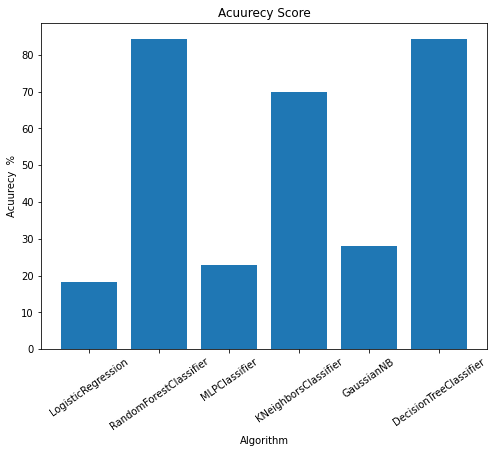

In [51]:
fig =plt.figure(figsize =(8,6))
plt.bar(accuracy_name,accuracy_data)
plt.xlabel("Algorithm")
plt.ylabel("Acuurecy  %")
plt.title("Acuurecy Score")
plt.xticks(rotation=35)
#plt.set_xlabel('Algorithm ')
#plt.set_ylabel("Acuurecy  %")
#plt.set_title('Acuurecy Score')
plt.show()


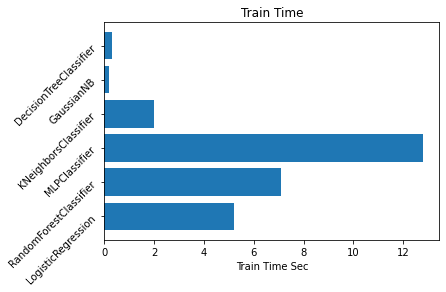

In [52]:
bars = plt.barh(accuracy_name,time1)


plt.xlabel("Train Time Sec")
#plt.ylabel('Algorithm ')
plt.title("Train Time")
plt.yticks(rotation=45)

#plt.set_xlabel('Algorithm ')
#plt.set_ylabel("Acuurecy  %")
#plt.set_title('Acuurecy Score')
plt.show()

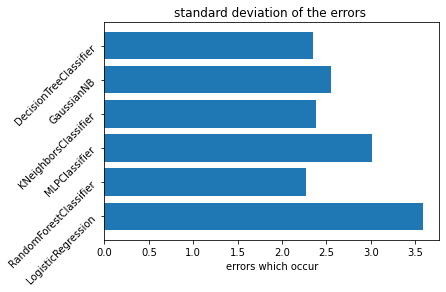

In [53]:
bars = plt.barh(accuracy_name,rMSE)


plt.xlabel("errors which occur")
#plt.ylabel('Algorithm ')

plt.yticks(rotation=45)
plt.title('standard deviation of the errors ')

#plt.set_xlabel('Algorithm ')
#plt.set_ylabel("Acuurecy  %")
#plt.set_title('standard deviation of the errors ')
plt.show()

In [54]:

team_1 = 'Sri Lanka'
team_2 = 'India'
host = 'Sri Lanka'
toss_Winner = 'Sri Lanka'

inp = [team_encode_dict['Team 1'][team_1],team_encode_dict['Team 2'][team_2],'4',team_encode_dict['Host_Country'][host],'1','0']
print(inp)
inp =np.array(inp).reshape((1,-1))

output =model_RF.predict(inp)
print(output)

#get team 1 team 2 id 
t1 =team_encode_dict['Team 1'][team_1]
t2 = team_encode_dict['Team 2'][team_2]
#print(t1)

if(output != t1 and output != t2):
    print("Predict Error \n Has Not Enough Date To Predict ")
else:
    print(f"The winner Would Be : {list(team_encodings.keys())[list(team_encode_dict['Team 1'].values()).index(output)]}")

[4, 1, '4', 4, '1', '0']
[1]
The winner Would Be : India


import seaborn as sns
team_1 = 'Sri Lanka'
team_2 = 'India'
#team1 = team_encode_dict['Team 1'][team_1]
#team2 = team_encode_dict['Team 2'][team_2]
team1 =team_encodings['Sri Lanka']
team2 =team_encodings['India']
mtemp =data[( (data['Team 1'] == team1)| (data['Team 2'] == team2)) &((data['Team 1'] == team2) |(data['Team 2'] == team1))]
sns.countplot(x = 'Host_Country', hue ='Winner',data =mtemp,palette = 'Blues')
plt.xtricks(rotation = 'vertical')
leg =plt.legend( loc = 'uppder left')
fig =plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [55]:
team_1 = 'Sri Lanka'
team_2 = 'India'
host = 'Sri Lanka'
toss_Winner = 'Sri Lanka'

inp = [team_encode_dict['Team 1'][team_1],team_encode_dict['Team 2'][team_2],'4',team_encode_dict['Host_Country'][host],'1','0']
print(inp)
inp =np.array(inp).reshape((1,-1))

output =model_MLP.predict(inp)
print(output)

#get team 1 team 2 id 
t1 =team_encode_dict['Team 1'][team_1]
t2 = team_encode_dict['Team 2'][team_2]
#print(t1)

if(output != t1 and output != t2):
    print("Predict Error \n Has Not Enough Date To Predict ")
else:
    print(f"The winner Would Be : {list(team_encodings.keys())[list(team_encode_dict['Team 1'].values()).index(output)]}")

[4, 1, '4', 4, '1', '0']
[1]
The winner Would Be : India


In [56]:
team_1 = 'Sri Lanka'
team_2 = 'India'
host = 'Sri Lanka'
toss_Winner = 'Sri Lanka'

inp = [team_encode_dict['Team 1'][team_1],team_encode_dict['Team 2'][team_2],'4',team_encode_dict['Host_Country'][host],'1','0']
print(inp)
inp =np.array(inp).reshape((1,-1))

output =model_KNC.predict(inp)
print(output)

#get team 1 team 2 id 
t1 =team_encode_dict['Team 1'][team_1]
t2 = team_encode_dict['Team 2'][team_2]
#print(t1)

if(output != t1 and output != t2):
    print("Predict Error \n Has Not Enough Date To Predict ")
else:
    print(f"The winner Would Be : {list(team_encodings.keys())[list(team_encode_dict['Team 1'].values()).index(output)]}")

[4, 1, '4', 4, '1', '0']
[1]
The winner Would Be : India


In [57]:
team_2 = 'India'
team_1 = 'Sri Lanka'
host = 'India'
toss_Winner = 'Sri Lanka'
inp = [team_encode_dict['Team 1'][team_1],team_encode_dict['Team 2'][team_2],'4',team_encode_dict['Host_Country'][host],team_encode_dict['Team 1'][toss_Winner],'0']
print(inp)
inp =np.array(inp).reshape((1,-1))

output =model_lr.predict(inp)
print(output)

#get team 1 team 2 id 
t1 =team_encode_dict['Team 1'][team_1]
t2 = team_encode_dict['Team 2'][team_2]

if(output != t1 and output != t2):
    print("Predict Error \n Has Not Enough Date To Predict ")
else:
    print(f"The winner Would Be : {list(team_encodings.keys())[list(team_encode_dict['Team 1'].values()).index(output)]}")

[4, 1, '4', 1, 4, '0']
[12]
Predict Error 
 Has Not Enough Date To Predict 


In [58]:
team_1 = 'Sri Lanka'
team_2 = 'India'
host = 'Sri Lanka'
toss_Winner = 'Sri Lanka'

inp = [team_encode_dict['Team 1'][team_1],team_encode_dict['Team 2'][team_2],'4',team_encode_dict['Host_Country'][host],'1','0']
print(inp)
inp =np.array(inp).reshape((1,-1))

output =model_NB.predict(inp)
print(output)

#get team 1 team 2 id 
t1 =team_encode_dict['Team 1'][team_1]
t2 = team_encode_dict['Team 2'][team_2]
#print(t1)

if(output != t1 and output != t2):
    print("Predict Error \n Has Not Enough Date To Predict ")
else:
    print(f"The winner Would Be : {list(team_encodings.keys())[list(team_encode_dict['Team 1'].values()).index(output)]}")

[4, 1, '4', 4, '1', '0']
[2]
Predict Error 
 Has Not Enough Date To Predict 


In [59]:
team_1 = 'Sri Lanka'
team_2 = 'India'
host = 'Sri Lanka'
toss_Winner = 'Sri Lanka'

inp = [team_encode_dict['Team 1'][team_1],team_encode_dict['Team 2'][team_2],'4',team_encode_dict['Host_Country'][host],'1','0']
print(inp)
inp =np.array(inp).reshape((1,-1))

output =model_DT.predict(inp)
print(output)

#get team 1 team 2 id 
t1 =team_encode_dict['Team 1'][team_1]
t2 = team_encode_dict['Team 2'][team_2]
#print(t1)

if(output != t1 and output != t2):
    print("Predict Error \n Has Not Enough Date To Predict ")
else:
    print(f"The winner Would Be : {list(team_encodings.keys())[list(team_encode_dict['Team 1'].values()).index(output)]}")

[4, 1, '4', 4, '1', '0']
[1]
The winner Would Be : India


In [60]:
print(rMSE)

[3.5911695325428665, 2.2747146916228607, 3.0147690970114756, 2.383997014117733, 2.5463311314982193, 2.350676782870513]


In [61]:
data

,Team 1,Team 2,Ground,Host_Country,Toss Winner,Toss_decision,Winner
0,2,7,96,2.0,7,1,2
1,7,2,94,7.0,2,1,7
2,7,2,92,7.0,2,0,2
3,7,2,16,7.0,2,1,7
4,6,3,35,6.0,3,0,6
...,...,...,...,...,...,...,...
7489,6,1,124,1.0,1,0,1
7490,6,1,76,1.0,1,1,1
7491,21,19,103,1.0,19,1,21
7492,23,17,103,1.0,17,1,23


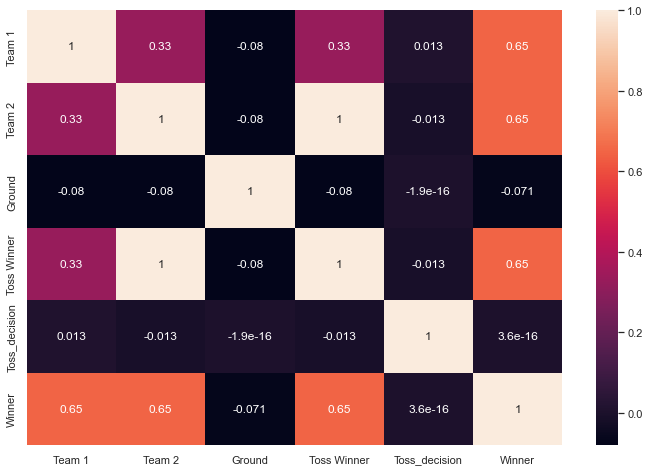

In [62]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
ax =sns.heatmap(data.corr(),annot=True)